In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
eachSeasonFolder = r"C:\Users\Eyal\Desktop\Bar-Ilan\Theoretical-Statistics\Final-Project\Each-Season-Data"
entireDataCSVPath = "./Entire-Data/Entire-Data.csv"
plotsFolder = "./Plots"
colors = sns.color_palette('pastel')
# colors = sns.color_palette("Set2")

In [16]:
def createEntireData():
    excel_files = [file for file in os.listdir(eachSeasonFolder) if file.endswith(".csv")]

    combined_data = pd.DataFrame()

    for file in excel_files:
        file_path = os.path.join(eachSeasonFolder, file)
        df = pd.read_csv(file_path,index_col=False)

        df.insert(2, 'Season', file.rsplit(".", 1)[0])

        combined_data = combined_data.append(df, ignore_index=True)
    
    combined_data.drop('Div', axis=1, inplace=True)
    
    combined_data.to_csv(entireDataCSVPath)
    
createEntireData()

In [17]:
entireDataDF = pd.read_csv(entireDataCSVPath)
entireDataDF.drop('Unnamed: 0', axis=1, inplace=True)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
entireDataDF

,Date,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,13/08/05,2005-2006,Aston Villa,Bolton,2,2,D,2,2,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13/08/05,2005-2006,Everton,Man United,0,2,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13/08/05,2005-2006,Fulham,Birmingham,0,0,D,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13/08/05,2005-2006,Man City,West Brom,0,0,D,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13/08/05,2005-2006,Middlesbrough,Liverpool,0,0,D,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,28/05/2023,2022-2023,Everton,Bournemouth,1,0,H,0,0,D,...,2.14,-1.00,2.02,1.77,2.10,1.81,2.17,1.92,2.03,1.83
6836,28/05/2023,2022-2023,Leeds,Tottenham,1,4,A,0,1,A,...,2.50,0.25,1.84,2.06,1.83,2.10,1.90,2.14,1.81,2.06
6837,28/05/2023,2022-2023,Leicester,West Ham,2,1,H,1,0,H,...,2.51,-0.25,1.75,2.05,1.85,2.06,1.90,2.16,1.82,2.04
6838,28/05/2023,2022-2023,Man United,Fulham,2,1,H,1,1,D,...,2.95,-1.25,1.98,1.92,1.98,1.93,2.07,1.98,1.97,1.89


In [19]:
def calculate_goals_per_season(df):
    goals_per_season = {}
    for index, row in df.iterrows():
        season = row['Season']
        fthg = row['FTHG']
        ftag = row['FTAG']

        if season not in goals_per_season:
            goals_per_season[season] = {'FTHG': 0, 'FTAG': 0}

        goals_per_season[season]['FTHG'] += fthg
        goals_per_season[season]['FTAG'] += ftag

    return goals_per_season


In [20]:
goals_per_season = calculate_goals_per_season(entireDataDF)

for season, goals in goals_per_season.items():
    print(f"Season: {season}")
    print(f"Total FTHG: {goals['FTHG']}")
    print(f"Total FTAG: {goals['FTAG']}")
    print("------------------")

Season: 2005-2006
Total FTHG: 555
Total FTAG: 389
------------------
Season: 2006-2007
Total FTHG: 552
Total FTAG: 379
------------------
Season: 2007-2008
Total FTHG: 581
Total FTAG: 421
------------------
Season: 2008-2009
Total FTHG: 532
Total FTAG: 410
------------------
Season: 2009-2010
Total FTHG: 645
Total FTAG: 408
------------------
Season: 2010-2011
Total FTHG: 617
Total FTAG: 446
------------------
Season: 2011-2012
Total FTHG: 604
Total FTAG: 462
------------------
Season: 2012-2013
Total FTHG: 592
Total FTAG: 471
------------------
Season: 2013-2014
Total FTHG: 598
Total FTAG: 454
------------------
Season: 2014-2015
Total FTHG: 560
Total FTAG: 415
------------------
Season: 2015-2016
Total FTHG: 567
Total FTAG: 459
------------------
Season: 2016-2017
Total FTHG: 607
Total FTAG: 457
------------------
Season: 2017-2018
Total FTHG: 582
Total FTAG: 436
------------------
Season: 2018-2019
Total FTHG: 596
Total FTAG: 476
------------------
Season: 2019-2020
Total FTHG: 576


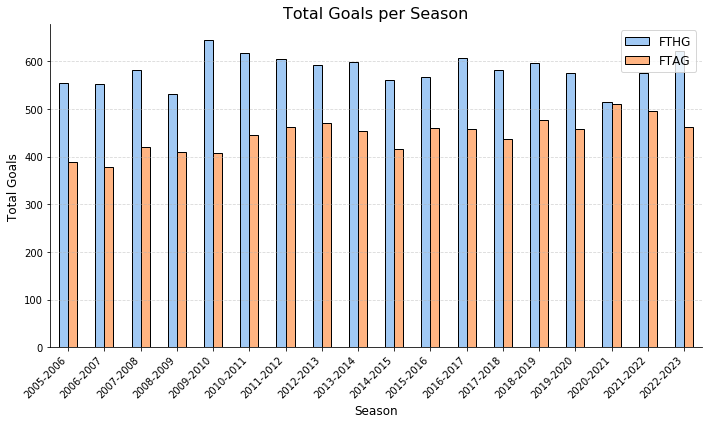

In [21]:
totalGoalsPerSeasonDF = pd.DataFrame.from_dict(goals_per_season, orient='index')
totalGoalsPerSeasonDF.reset_index(inplace=True)
totalGoalsPerSeasonDF.rename(columns={'index': 'Season'}, inplace=True)

ax = totalGoalsPerSeasonDF.plot(x='Season', kind='bar', figsize=(10, 6), color=colors, edgecolor='black')

plt.title('Total Goals per Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Goals', fontsize=12)
plt.legend(['FTHG', 'FTAG'], fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.grid(True, linestyle='--', alpha=0.5)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()

plt.savefig(os.path.join(plotsFolder, 'total-goals-per-season.png'))
plt.show()

In [22]:
def calculate_goals_per_month(df):
    df['Date'] = pd.to_datetime(df['Date'])

    df['Month'] = df['Date'].dt.month

    goals_per_month = df.groupby('Month')[['FTHG', 'FTAG']].sum()

    return goals_per_month


In [23]:
goals_per_month = calculate_goals_per_month(entireDataDF)

print(goals_per_month)


       FTHG  FTAG
Month            
1      1173   901
2       870   610
3       859   611
4      1099   808
5       738   555
6       281   219
7       298   248
8       944   717
9      1034   773
10     1013   790
11      914   697
12     1251  1081


In [24]:
def plot_goals_per_month(goals_per_month):
    months = goals_per_month.index

    fthg_goals = goals_per_month['FTHG']
    ftag_goals = goals_per_month['FTAG']

    bar_width = 0.35


    plt.figure(figsize=(10, 6))

    plt.bar(months, fthg_goals, width=bar_width, label='Full Time Home Team Goals', color=colors[0])
    plt.bar(months, ftag_goals, width=bar_width, label='Full Time Away Team Goals', alpha=0.7, color=colors[1])

    month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    plt.xticks(months, month_names, rotation=45, ha='right')

    plt.xlabel('Month')
    plt.ylabel('Goals')
    plt.title('Total Goals per Month')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.yaxis.grid(True, linestyle='--', alpha=0.5)

    plt.xticks(rotation=45, ha='right', fontsize=10)

    plt.tight_layout()
    
    plt.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(plotsFolder, 'total-goals-per-month.png'))
    plt.show()


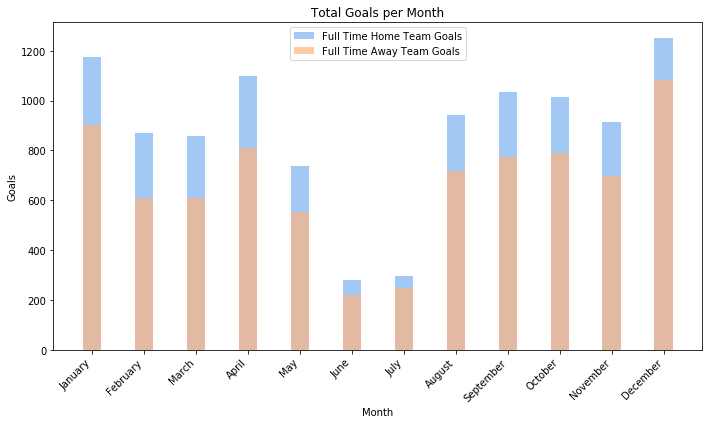

In [25]:
plot_goals_per_month(goals_per_month)
